In [1]:
!pip install seaborn

Probabilitas paket dikirim dalam waktu kurang dari 3 hari: 0.1584
Probabilitas paket dikirim dalam waktu antara 4 dan 7 hari: 0.5318


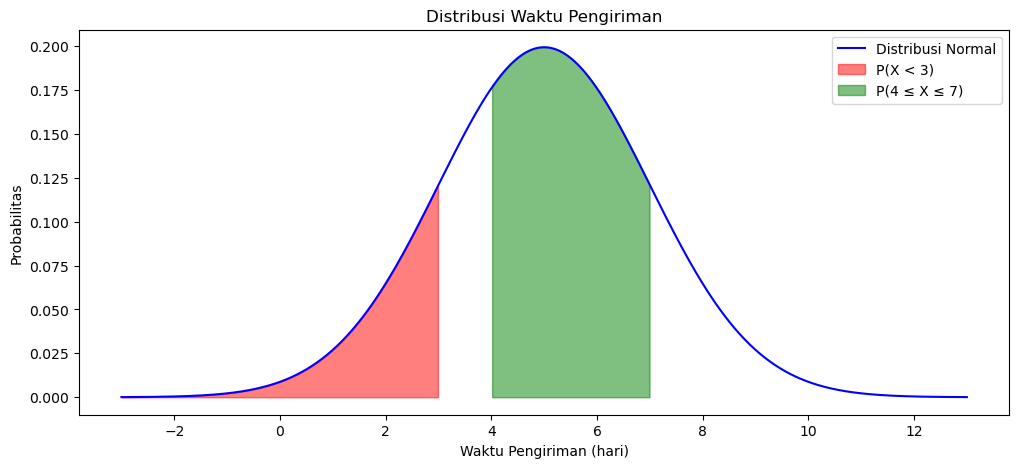

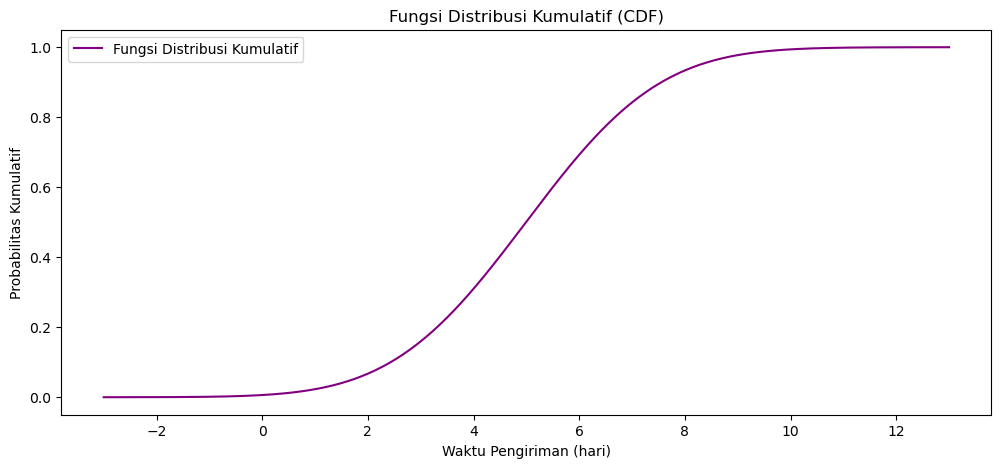

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Parameter distribusi normal
mu = 5  # Rata-rata waktu pengiriman
sigma = 2  # Standar deviasi waktu pengiriman

# 1. Distribusi waktu pengiriman paket
df = pd.DataFrame({'x': np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)})
df['pdf'] = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((df['x'] - mu) / sigma) ** 2)
df['cdf'] = df['pdf'].cumsum() / df['pdf'].sum()

# 2. Probabilitas paket dikirim dalam waktu kurang dari 3 hari
p_less_than_3 = df[df['x'] < 3]['pdf'].sum() / df['pdf'].sum()
print(f"Probabilitas paket dikirim dalam waktu kurang dari 3 hari: {p_less_than_3:.4f}")

# 3. Probabilitas paket dikirim dalam waktu antara 4 dan 7 hari
p_between_4_and_7 = df[(df['x'] >= 4) & (df['x'] <= 7)]['pdf'].sum() / df['pdf'].sum()
print(f"Probabilitas paket dikirim dalam waktu antara 4 dan 7 hari: {p_between_4_and_7:.4f}")

# 4. Visualisasi distribusi dan probabilitas kumulatif
plt.figure(figsize=(12, 5))

# Plot distribusi probabilitas dengan Seaborn
sns.lineplot(x=df['x'], y=df['pdf'], label='Distribusi Normal', color='blue')
plt.fill_between(df['x'], df['pdf'], where=(df['x'] < 3), color='red', alpha=0.5, label='P(X < 3)')
plt.fill_between(df['x'], df['pdf'], where=((df['x'] >= 4) & (df['x'] <= 7)), color='green', alpha=0.5, label='P(4 ≤ X ≤ 7)')
plt.title('Distribusi Waktu Pengiriman')
plt.xlabel('Waktu Pengiriman (hari)')
plt.ylabel('Probabilitas')
plt.legend()
plt.show()

plt.figure(figsize=(12, 5))

# Plot fungsi distribusi kumulatif (CDF) dengan Seaborn
sns.lineplot(x=df['x'], y=df['cdf'], label='Fungsi Distribusi Kumulatif', color='purple')
plt.title('Fungsi Distribusi Kumulatif (CDF)')
plt.xlabel('Waktu Pengiriman (hari)')
plt.ylabel('Probabilitas Kumulatif')
plt.legend()
plt.show()